In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def truncar(numero, decimales = 0):
    return np.trunc(numero*10**decimales)/(10**decimales)

In [3]:
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras = 3):
    texto = str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
    return texto

In [4]:
def lineal(x, a, b):
    linea = a*x + b
    return linea

In [5]:
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y, pesos = None):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(modelo, x, y,
                                    #bounds  = ([-1, -1], [20, 20]),
                                    #p0 = [1, 2],
                                    sigma = pesos)
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    residuo = y - predicciones
    return predicciones, ajuste, errores, r_cuadrado, residuo

In [6]:
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    texto = str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
    return texto
def grafico_modelo(x, y, predicciones, ajuste,
                   errores, r_cuad, nombres,
                   j = 3
                  ):
    etiqueta = ''
    iterador = list(range(len(nombres)))
    for i in iterador:
        valor = cifras_signif(ajuste[i], j)
        error = cifras_signif(errores[i], j)
        etiqueta = (etiqueta
                    + ' ' + nombres[i] + ' = ' + valor
                    + '; std ' + nombres[i] + ' = ' + error
                    + '\n')
    etiqueta = etiqueta + ' R^2 = ' + cifras_signif(r_cuad, j)
    plt.plot(x, y, 'bo', markersize = 2)
    plt.plot(x, predicciones, 'r-',
             label = etiqueta
             )
    plt.legend(fontsize = 20)
    return
def grafico_residuos(x, res):
    plt.plot(x, res, 'bo', markersize = 2)
    plt.axhline(0, color = 'black', linestyle = '--')
    return

In [7]:
def regresion_y_grafico(modelo, x, y, xlabel,
                        ylabel, nombres, pesos = None):
    predicciones, ajuste, errores, r_cuadrado, res = regresion(modelo,
                                                               x, y,
                                                               pesos)
    plt.subplot(121)
    grafico_modelo(x, y, predicciones, ajuste,
                   errores, r_cuadrado, nombres
                  )
    metadata(xlabel, ylabel)
    plt.subplot(122)
    grafico_residuos(x, res)
    metadata(xlabel, ylabel)
    return ajuste, r_cuadrado, errores

In [23]:
datos = pd.read_csv(
    #'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Completos_buenos.txt',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    skiprows = [1],
    encoding = 'ascii'
    )

In [24]:
resumen(datos)

Forma:
 (14442, 38) 

 Columnas:
 Index(['Year', 'DoY', 'Hour', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH',
       'VPD', 'Ustar', 'TS1', 'TS2', 'TS3', 'TS4', 'U', 'DIR', 'PP', 'QG1',
       'QG2', 'WET', 'PAR', 'TSH1', 'HS1', 'GH1', 'TSH2', 'HS2', 'GH2', 'TSH3',
       'HS3', 'GH3', 'TSH4', 'HS4', 'GH4', 'PAR.1', '   r_err_co2[%]',
       '   noise_co2[%]'],
      dtype='object') 

 Tipos:
 Year               float64
DoY                float64
Hour               float64
NEE                float64
LE                 float64
H                  float64
Rg                 float64
Tair               float64
Tsoil              float64
rH                 float64
VPD                float64
Ustar              float64
TS1                float64
TS2                float64
TS3                float64
TS4                float64
U                  float64
DIR                float64
PP                 float64
QG1                float64
QG2                float64
WET                float64
PAR     

In [25]:
datos = datos.dropna(subset = ['Rg', 'PAR.1'])
datos = datos[(datos['Rg']>1)
              & (datos['PAR.1']>1)
             ]

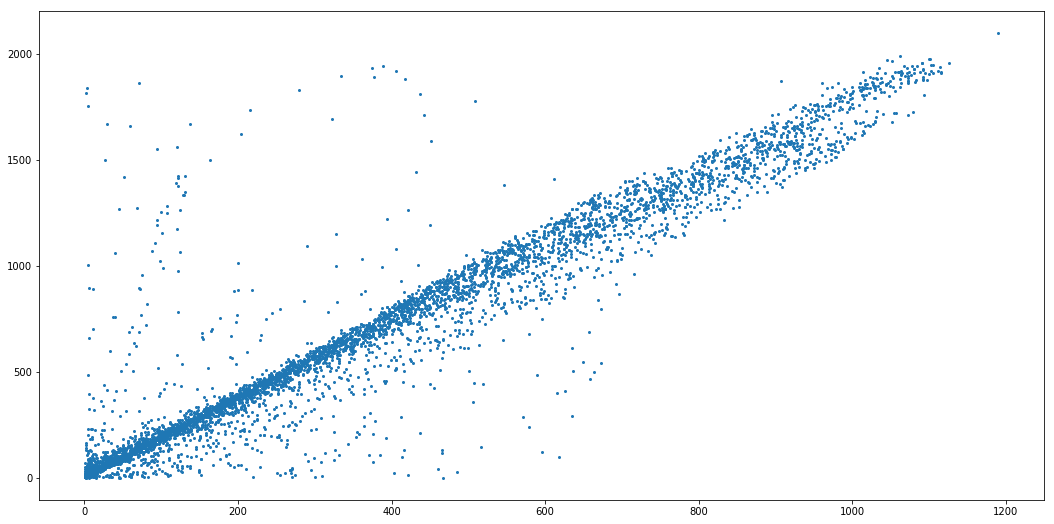

In [26]:
x = datos['Rg'][(datos['DoY'] <= 107)
                | (datos['DoY'] > 140)
                ]
y = datos['PAR.1'][(datos['DoY'] <= 107)
                   | (datos['DoY'] > 140)
                   ]
plt.figure(figsize=(18,9))
plt.plot(x, y, 'o', ms = '2')

(array([ 1.68684399, 43.38335099]),
 0.9085913586460208,
 array([0.00722036, 3.41679434]))

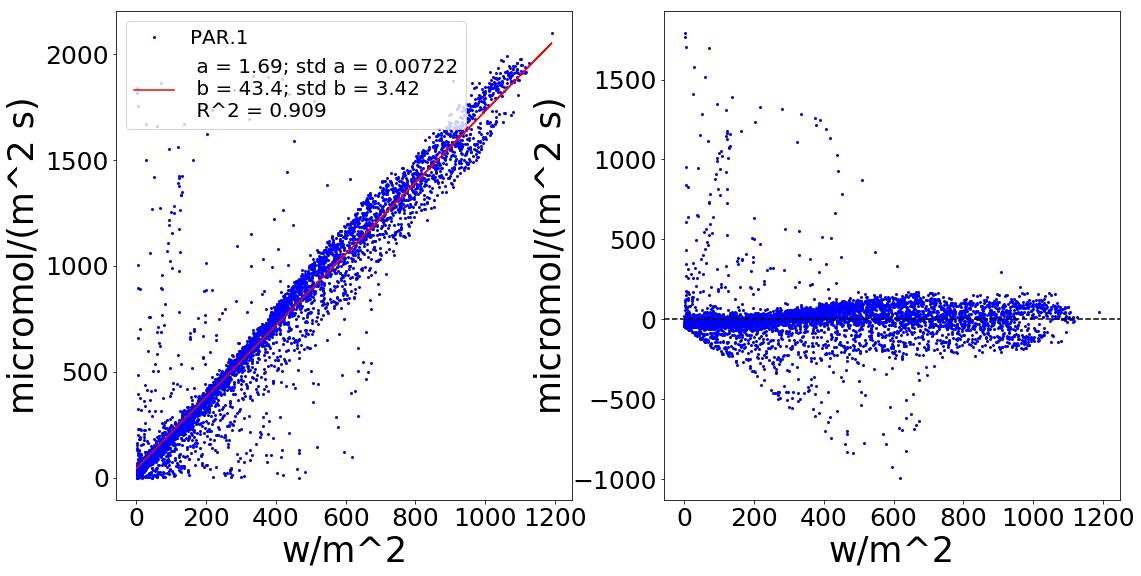

In [27]:
plt.figure(figsize = (18, 9))
regresion_y_grafico(lineal, x, y, 'w/m^2', 'micromol/(m^2 s)', ['a', 'b'])